In [19]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv('scholarship_applications.csv')

In [21]:
data.head(5)

,Student ID,Name,University,Degree Program,Year of Study,GPA,Extracurricular Activities,Leadership Roles,Community Service Hours,Family Income,Special Needs,State of Origin,Scholarship Provider,Essay Score,Recommendation Score,Eligibility Criteria Met,Awarded Scholarship
0,STU3835,David King,Osborn Inc University,Electrical Engineering,1,4.78,Debate,NaN,101,136185,No,Maine,NNPC,97,86,Yes,Yes
1,STU2612,Sharon Sandoval,Johnson Group University,Medicine,2,2.54,Drama,Class Representative,136,428204,No,Alaska,Chevron,70,94,Yes,No
2,STU8277,Christopher Black,Cervantes-Merritt University,Business Administration,3,2.88,Debate,Class Representative,25,947689,No,Virginia,Snepco,82,93,Yes,Yes
3,STU5423,John Roberson,"Garcia, Davis and Gardner University",Computer Science,4,3.50,Sports,Club President,49,630695,No,Kansas,AAF,82,73,Yes,No
4,STU1537,Sharon May,Pruitt-Miles University,Computer Science,4,3.19,Arts Club,Class Representative,100,849780,No,Louisiana,KPMG,89,80,Yes,Yes


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student ID                  100 non-null    object 
 1   Name                        100 non-null    object 
 2   University                  100 non-null    object 
 3   Degree Program              100 non-null    object 
 4   Year of Study               100 non-null    int64  
 5   GPA                         100 non-null    float64
 6   Extracurricular Activities  100 non-null    object 
 7   Leadership Roles            69 non-null     object 
 8   Community Service Hours     100 non-null    int64  
 9   Family Income               100 non-null    int64  
 10  Special Needs               100 non-null    object 
 11  State of Origin             100 non-null    object 
 12  Scholarship Provider        100 non-null    object 
 13  Essay Score                 100 non-

In [23]:
data.shape#

(100, 17)

In [24]:
data.isna().sum()

,0
Student ID,0
Name,0
University,0
Degree Program,0
Year of Study,0
GPA,0
Extracurricular Activities,0
Leadership Roles,31
Community Service Hours,0
Family Income,0


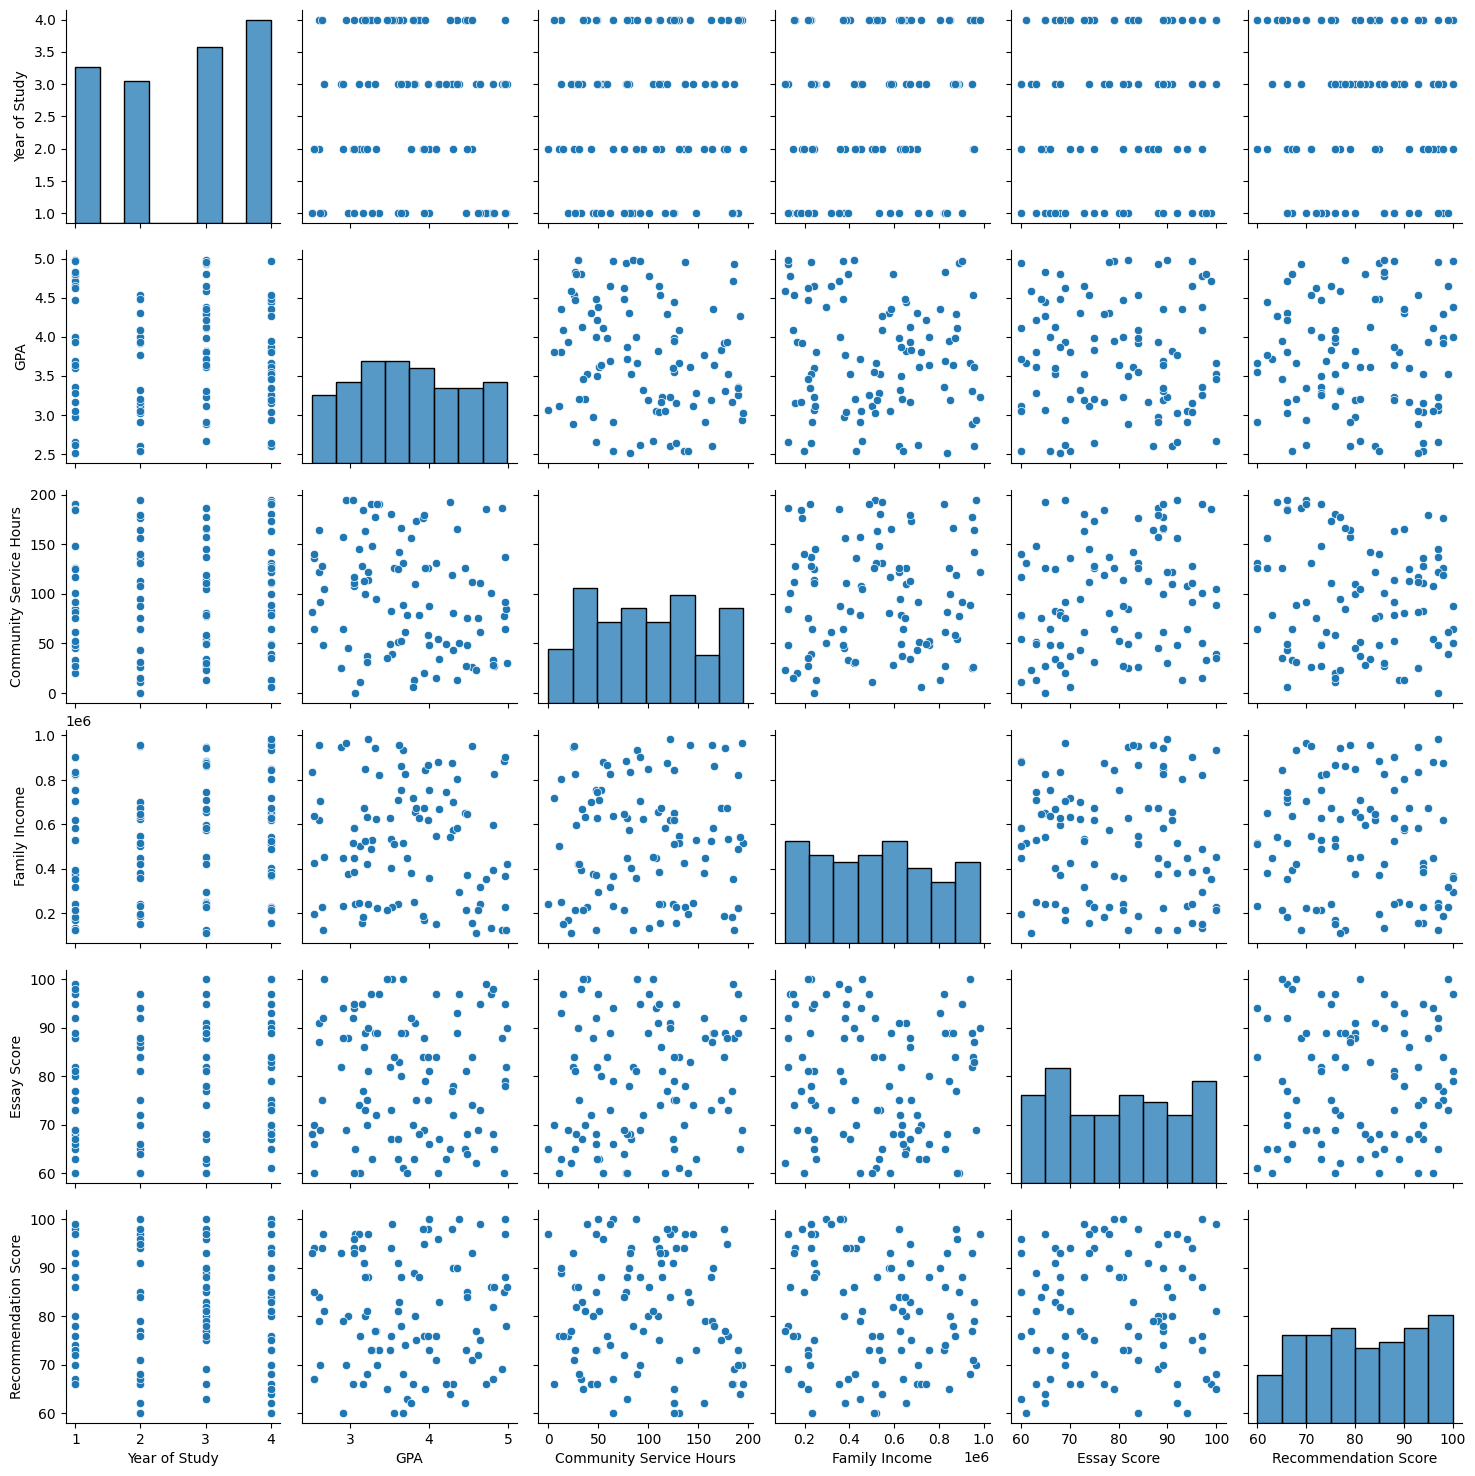

In [25]:
sns.pairplot(data)

In [26]:
data.describe()

,Year of Study,GPA,Community Service Hours,Family Income,Essay Score,Recommendation Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.630000,3.741700,96.870000,525734.990000,79.410000,81.060000
std,1.142874,0.711778,55.384725,258726.498673,12.346917,11.717051
min,1.000000,2.510000,0.000000,111000.000000,60.000000,60.000000
25%,2.000000,3.185000,48.750000,250037.750000,68.000000,71.750000
50%,3.000000,3.680000,93.500000,527599.000000,79.500000,80.500000
75%,4.000000,4.315000,136.250000,711707.500000,89.250000,91.500000
max,4.000000,4.990000,195.000000,981868.000000,100.000000,100.000000


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
col=['University','Degree Program','Extracurricular Activities','Leadership Roles','Special Needs','State of Origin','Scholarship Provider','Eligibility Criteria Met']
for i in col:
    data[i]=le.fit_transform(data[i])

In [34]:
y=data['Awarded Scholarship']#dependent variable
X=data[['University', 'Degree Program', 'Year of Study',
       'GPA', 'Extracurricular Activities']]#data.drop(['Student ID','Awarded Scholarship','Name'],axis=1)#feature/independent

In [35]:
from sklearn.model_selection import train_test_split#spliting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
model_rf=RandomForestClassifier()#

In [38]:
#trining the model
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
pred=model_rf.predict(X_test)

In [40]:
import pickle,joblib

In [41]:
# Saving the trained model using pickle
with open('scholarship333.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

In [42]:
import sklearn
print(sklearn.__version__)

1.4.0


In [1]:
pip install scikit-learn==1.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 69.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
pred

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No'], dtype=object)

In [ ]:
#import the accuracy metrics
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred,y_test)

0.7878787878787878

In [ ]:
#LogisticRegression

In [ ]:
model_lr=LogisticRegression()

In [ ]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred2=model_lr.predict(X_test)

In [ ]:
pred2

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No'],
      dtype=object)

In [ ]:
accuracy_score(pred2,y_test)

0.6363636363636364